<a href="https://colab.research.google.com/github/mhmmdmin/Assignment/blob/main/Assignment_Day_14_Muhammad_Amin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Basic Assignment

##Question 1

Jelaskan mengapa proses matching perlu dilakukan ketika ingin mengukur dampak dari suatu treatment pada propensity score modeling?


Answer:
Rubin and Thomas (1992b) and Rubin and Thomas (1996), kenapa proses matching perlu dilakukan adalah untuk mendapatkan perkiraan analitik untuk mengurangi bias dari outcome yang dapat diperoleh ketika melakukan matching terhadap diskriminan yang sebenarnya atau yang diperkirakan dengan kovariat yang terdistribusi normal.

---
Rubin DB, Thomas N. Characterizing the effect of matching using linear propensity score methods with normal distributions. Biometrika. 1992b;79:797–809.

Rubin DB, Thomas N. Matching using estimated propensity scores, relating theory to practice. Biometrics. 1996;52:249–264.

## Question 2

Sebelum adanya Double ML, peneliti machine learning menggunakan metode Double Selection untuk menguji efek dari treatment. Namun pada akhirnya Double Machine Learning digunakan karena lebih baik dibandingkan dengan Double Selection. Jelaskan mengapa Double ML lebih baik digunakan ketimbang Double Selection? Masalah apa yang ada pada Double Selection yang dapat diselesaikan dengan Double ML?


Answer:
DML lebih baik daripada Double Selection karena DML menghilangkan bias asimtotik dari estimasi koefisien dari T parameter. Di mana masalah yang sering muncul pada Double Selection adalah mengharuskan mengontrol features-features yang mempengaruhi noise pada data tersebut, yang nyatanya itu sangat unrealistic untuk dilakukan pada setiap project.


---



https://medium.com/teconomics-blog/using-ml-to-resolve-experiments-faster-bd8053ff602e#:~:text=Relative%20to%20Double%20Selection%2C%20Double,to%20be%20the%20clear%20winner.

## Question 3

Ada banyak metrik yang dapat digunakan untuk mengukur dampak dari suatu variabel: ATE, CATE, dan LATE. Jelaskan kapan masing-masing metrik digunakan!

Answer:
1. Metrik ATE digunakan ketika kita ingin melihat dampak dari suatu variabel secara komposisional bukan secara individual. Biasa digunakan dalam industri medis karena memungkinkan untuk mengisolasi individu2 yang akan dirawat dengan treatment2 tertentu, tapi untuk digunakan dalam social science hal ini akan sangat sulit.

2. Metrik CATE digunakan ketika kita ingin melihat heterogenitas dari dampak treatment pada subpopulasi atau group populasi ketika asumsi unconfoundedness berlaku. CATE juga digunakan untuk menangkap variasi yang digunakan untuk mengidentifikasi unconditional average.

3. Metrik LATE digunakan untuk melihat dampak dari treatment hanya kepada "complier" (mereka yang melakukan treatment jika diperlukan dan sebaliknya). LATE tidak menangkap dampak treatment dari setiap subjek dalam populasi.





---
https://statmodeling.stat.columbia.edu/2020/06/30/understanding-the-average-treatment-effect-number/

http://www.personal.ceu.hu/staff/Robert_Lieli/cate.pdf

https://egap.org/resource/10-things-to-know-about-the-local-average-treatment-effect/

## Question 4

Berikut adalah pertanyaan open-ended, akan dinilai berdasarkan argumentasi yang memiliki landasan. 
Kita dapat mengekstrak knowledge dari model dengan menggunakan interpretable machine learning. Namun kita juga dapat menggunakan metode seperti double ML untuk mendapatkan pola sebab-akibat berdasarkan data generation process. Mana metode yang lebih baik untuk menjelaskan dampak dari akibat? Kapan metode interpretable machine learning dapat digunakan untuk analisis kausal?

Answer:
Menurut saya metode yang lebih baik untuk menjelaskan dampak dari akibat adalah interpretable machine learning. Metode interpretable machine learning dapat digunakan untuk analisis kausal ketika ingin menjelaskan counterfactual model.



---


https://arxiv.org/pdf/2006.16789.pdf

# Advanced Assignment

##Install and Load Packages

In [1]:
!pip install econml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 28.2 MB/s 
     |████████████████████████████████| 164 kB 53.5 MB/s 
     |████████████████████████████████| 564 kB 38.6 MB/s 
     |████████████████████████████████| 77 kB 6.5 MB/s 
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [2]:
# data exploration package
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# scikit learn
from sklearn.linear_model import ElasticNetCV, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# econml
from econml.dml import DML
from econml.metalearners import TLearner, SLearner, XLearner

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Load Dataset

In [3]:
mindset = pd.read_csv("https://raw.githubusercontent.com/hadimaster65555/dataset_for_teaching/main/dataset/learning_mindset/learning_mindset.csv")

##Check Dataset and Its Structure

In [5]:
mindset.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,76,1,0.277359,6,4,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
1,76,1,-0.449646,4,12,2,1,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
2,76,1,0.769703,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
3,76,1,-0.121763,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
4,76,1,1.526147,6,4,1,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757


In [6]:
mindset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   schoolid                10391 non-null  int64  
 1   intervention            10391 non-null  int64  
 2   achievement_score       10391 non-null  float64
 3   success_expect          10391 non-null  int64  
 4   ethnicity               10391 non-null  int64  
 5   gender                  10391 non-null  int64  
 6   frst_in_family          10391 non-null  int64  
 7   school_urbanicity       10391 non-null  int64  
 8   school_mindset          10391 non-null  float64
 9   school_achievement      10391 non-null  float64
 10  school_ethnic_minority  10391 non-null  float64
 11  school_poverty          10391 non-null  float64
 12  school_size             10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB


In [7]:
#check duplicate
mindset.duplicated().sum()

0

In [8]:
# Check unique value
for x in mindset.columns:
  print(f"unique of {x} ")
  print(f"{mindset[x].unique()}")
  print()

unique of schoolid 
[76 75 74 73 72 71 70 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55 54 53
 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29
 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5
  4  3  2  1]

unique of intervention 
[1 0]

unique of achievement_score 
[ 0.27735862 -0.44964639  0.76970344 ...  0.37082009 -0.39629671
  0.47897006]

unique of success_expect 
[6 4 7 5 3 1 2]

unique of ethnicity 
[ 4 12  5  1  2 14 15 10  6  9  8  7 11  3 13]

unique of gender 
[2 1]

unique of frst_in_family 
[1 0]

unique of school_urbanicity 
[4 3 1 0 2]

unique of school_mindset 
[ 0.33454352  0.99162827  0.98398211 -0.46294452  0.4204414  -3.08878982
  0.98824178 -0.05057947 -0.03439241 -1.11533652  1.02177695 -0.95397163
 -0.35420731 -1.29411031 -1.13224131 -1.16814528  0.92418344  0.20834922
 -0.61788794  0.09716239  1.18151615  1.93658085  0.25531863  0.999101
  0.19760784 -1.0362246   0.2113852   0.92542289  0.17342362 -1.23927231
  1.0

##Data Inspection

In [9]:
mindset.groupby('intervention').agg({
    'schoolid': 'nunique',
    'achievement_score': 'mean'
}).rename(columns={
    'schoolid': 'Total Schools',
    'achievement_score': 'Average Achievement Score'
})

,Total Schools,Average Achievement Score
intervention,,
0,76,-0.153803
1,76,0.318469


As we can see schools that attend growth mindset seminar tend to have a better achievement score.

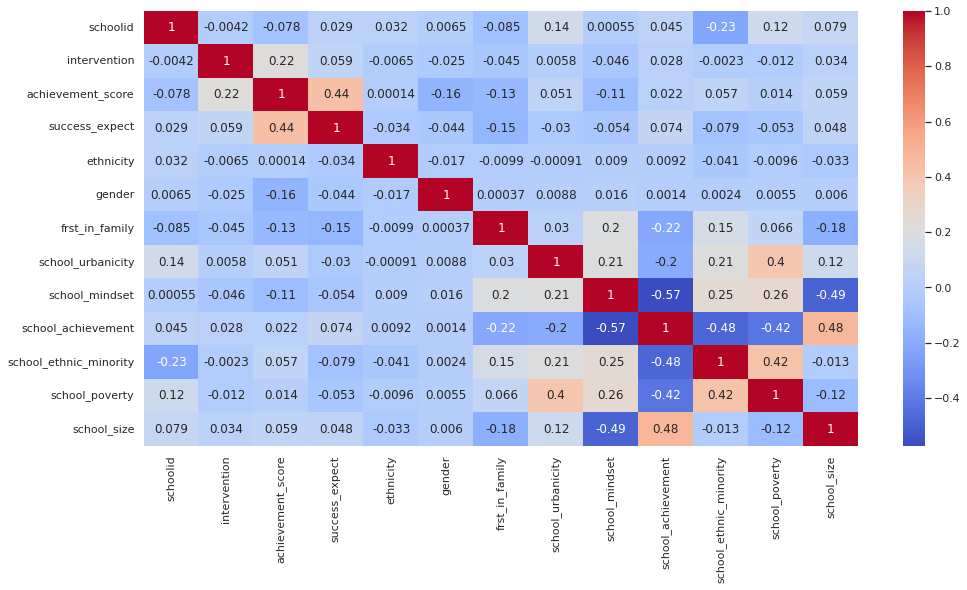

In [42]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(mindset.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

##Modeling

In [21]:
# Make new dataset and randomize to be splitted
shuffled = mindset.sample(frac=1)
shuffled = shuffled.reset_index()
shuffled = shuffled.drop(['index'], axis = 1)

In [22]:
# Split into 2 dataset
mindset_train = shuffled.iloc[:7275]
mindset_test = shuffled.iloc[7275:]

In [24]:
# Check Train dataset
mindset_train.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
0,62,0,-0.425467,5,8,2,0,4,-1.132241,0.726836,-0.057036,1.330512,1.892348
1,64,1,0.188707,5,4,2,1,2,-0.354207,1.264388,-0.819529,-1.158360,0.810117
2,47,0,2.219649,6,4,1,0,4,-1.239272,0.599242,0.005429,1.267680,0.958510
3,30,0,-0.885908,5,14,2,1,1,0.406316,0.040247,-0.203808,-0.220041,-0.806151
4,69,0,0.383555,7,2,1,0,1,-0.050579,1.112420,-0.138822,-1.185513,0.998884


In [25]:
# Check Test Dataset
mindset_test.head()

,schoolid,intervention,achievement_score,success_expect,ethnicity,gender,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_ethnic_minority,school_poverty,school_size
7275,47,1,0.830018,5,4,1,0,4,-1.239272,0.599242,0.005429,1.267680,0.958510
7276,27,0,1.009752,7,1,1,0,1,0.240267,-0.785287,0.611807,0.612568,-0.116284
7277,26,1,0.037516,5,4,2,1,4,-0.283624,-0.588563,0.192676,-0.259910,-0.056286
7278,76,1,0.009607,6,4,2,0,4,0.334544,0.648586,-1.310927,0.224077,-0.426757
7279,1,0,-1.241326,5,4,1,1,3,1.185986,-1.129889,1.009875,1.005063,-1.174702


In [31]:
# outcome
y = "achievement_score"
# treatment
T = "intervention"
# covariates
X = ["success_expect", "frst_in_family", "school_urbanicity", "school_mindset", "school_achievement", "school_poverty"]

Why I choose `success_expect`, `frst_in_family`, `school_urbanicity`, `school_mindset`, `school_achievement`, and `school_poverty` because;

1. Success expect is the expectation of individual in the future. So it should affect the outcome. It has a weak correlation with achievement score.
2. First in family is the first person in the family who go to the college. I think it also should affect the outcome because in Adlerian Psychology the first born tends to be the best in the family.
3. School urbanicity is the location of the school according to population. In my opinion, the students in the least population should have a spirit to achieve more, a spirit to change their condition.
4. School mindset is school-level mean of students’ fixed mindset. The more fixed school mindset also tends to have fixed students that affect their achievement.
5. School Achievement is school achievement level, as measured by test scores and college preparation for the previous 4 cohorts of students. The higher school achievement should have higher growth mindset and achivement score.
6. The last is school poverty, school poverty concentration, i.e., percentage of students who are from families whose incomes fall below the federal poverty line. It also should affect the outcome when the poverty school attend the growth mindset seminar.

In [32]:
mindset_train[y]

0      -0.425467
1       0.188707
2       2.219649
3      -0.885908
4       0.383555
          ...   
7270    0.788492
7271   -1.237022
7272   -0.296593
7273   -0.342415
7274   -0.991845
Name: achievement_score, Length: 7275, dtype: float64

In [33]:
mindset_train[T]

0       0
1       1
2       0
3       0
4       0
       ..
7270    1
7271    0
7272    1
7273    0
7274    0
Name: intervention, Length: 7275, dtype: int64

In [34]:
mindset_train[X]

,success_expect,frst_in_family,school_urbanicity,school_mindset,school_achievement,school_poverty
0,5,0,4,-1.132241,0.726836,1.330512
1,5,1,2,-0.354207,1.264388,-1.158360
2,6,0,4,-1.239272,0.599242,1.267680
3,5,1,1,0.406316,0.040247,-0.220041
4,7,0,1,-0.050579,1.112420,-1.185513
...,...,...,...,...,...,...
7270,7,0,2,-0.354207,1.264388,-1.158360
7271,5,0,2,-0.354207,1.264388,-1.158360
7272,5,0,1,-0.617888,-0.163619,-0.946657
7273,6,1,4,1.570640,-1.021504,1.043998


##DML

The reason I choose DML because I want to try this method where the treatment neither discrete nor continuous. 

In [35]:
# define DML Object
dml_est = DML(
    model_y = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_t = GradientBoostingRegressor(n_estimators=100, random_state = 1000),
    model_final = LinearRegression(fit_intercept=False),
    random_state = 1000
)

In [37]:
# fit estimator to train data
np.random.seed(1000)
dml_est.fit(mindset_train[y], T = mindset_train[T], X = mindset_train[X], inference="bootstrap")

In [38]:
dml_est.summary()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
success_expect,0.006,0.02,0.302,0.41,-0.029,0.039
frst_in_family,-0.013,0.039,-0.319,0.42,-0.085,0.064
school_urbanicity,0.021,0.016,1.333,0.19,-0.013,0.046
school_mindset,-0.067,0.025,-2.681,0.02,-0.106,-0.009
school_achievement,0.005,0.03,0.163,0.35,-0.047,0.065
school_poverty,0.023,0.031,0.74,0.19,-0.028,0.09
,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
cate_intercept,0.322,0.124,2.589,0.0,0.088,0.548


Based on the result we can interpret the model:
- We can observe that school mindset has negative impact to achievement score and are statistically significant. I think it makes sense when the school mindset is fixed mindset, the achievement score is low.
- The others is not statistically significant. In the first assumption I think success expect will have an impact to achievement score. Because it has weak correlation. But there's a possibility where achievement score that will impact the success expect.
- Intervention of growth mindset seminar has positive impact to achievement score and statistically significant. And I think it makes sense when students know about growth mindset and implement it, they will have a better score.

In [39]:
# Get treatment effect and its confidence interval
te_pred = dml_est.effect(mindset_test[X])

In [40]:
# Measure price effect
np.mean(te_pred)

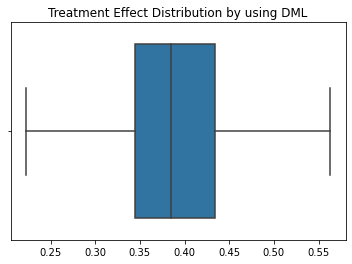

In [41]:
# check treatment effect distribution
sns.boxplot(x = te_pred).set_title("Treatment Effect Distribution by using DML");

Because the ATE is positive, we can interpret that as the student attends growth mindset seminar, their achievement score will increase.